In [1]:
import pandas as pd
import numpy as np

df = pd.read_json("Data/alldrives2018.json")
df = df.sort_values(by=["game_id", "start_period"])
df

,defense,defense_conference,drive_result,elapsed,end_period,end_time,end_yardline,game_id,id,offense,offense_conference,plays,scoring,start_period,start_time,start_yardline,yards
0,Louisville,ACC,TD,"{'minutes': 3, 'seconds': 5}",1,"{'minutes': 11, 'seconds': 55}",100,401012246,4010122461,Alabama,SEC,7,True,1,{'minutes': 15},35,65
1,Alabama,SEC,PUNT,"{'minutes': 1, 'seconds': 45}",1,"{'minutes': 10, 'seconds': 10}",55,401012246,4010122462,Louisville,ACC,4,False,1,"{'minutes': 11, 'seconds': 55}",75,20
2,Louisville,ACC,FUMBLE,"{'minutes': 3, 'seconds': 6}",1,"{'minutes': 7, 'seconds': 4}",65,401012246,4010122463,Alabama,SEC,8,False,1,"{'minutes': 10, 'seconds': 10}",20,63
3,Alabama,SEC,PUNT,{'minutes': 1},1,"{'minutes': 6, 'seconds': 4}",84,401012246,4010122464,Louisville,ACC,3,False,1,"{'minutes': 7, 'seconds': 4}",83,-1
4,Louisville,ACC,TD,{'minutes': 2},1,"{'minutes': 4, 'seconds': 4}",100,401012246,4010122465,Alabama,SEC,6,True,1,"{'minutes': 6, 'seconds': 4}",45,55
5,Alabama,SEC,INT,"{'minutes': 4, 'seconds': 48}",2,"{'minutes': 14, 'seconds': 16}",26,401012246,4010122466,Louisville,ACC,8,False,1,"{'minutes': 4, 'seconds': 4}",75,49
6,Louisville,ACC,TD,"{'minutes': 2, 'seconds': 52}",2,"{'minutes': 11, 'seconds': 24}",100,401012246,4010122467,Alabama,SEC,6,True,2,"{'minutes': 14, 'seconds': 16}",25,75
7,Alabama,SEC,PUNT,"{'minutes': 3, 'seconds': 19}",2,"{'minutes': 8, 'seconds': 5}",55,401012246,4010122468,Louisville,ACC,6,False,2,"{'minutes': 11, 'seconds': 24}",86,31
8,Louisville,ACC,PUNT,"{'minutes': 1, 'seconds': 47}",2,"{'minutes': 6, 'seconds': 18}",41,401012246,4010122469,Alabama,SEC,5,False,2,"{'minutes': 8, 'seconds': 5}",22,19
3595,Alabama,SEC,PUNT,"{'minutes': 1, 'seconds': 33}",2,"{'minutes': 4, 'seconds': 45}",60,401012246,40101224610,Louisville,ACC,4,False,2,"{'minutes': 6, 'seconds': 18}",80,20


In [2]:
df = df[["offense", "defense", "game_id", "plays", "start_yardline", "yards", "end_yardline", "drive_result"]]
df

,offense,defense,game_id,plays,start_yardline,yards,end_yardline,drive_result
0,Alabama,Louisville,401012246,7,35,65,100,TD
1,Louisville,Alabama,401012246,4,75,20,55,PUNT
2,Alabama,Louisville,401012246,8,20,63,65,FUMBLE
3,Louisville,Alabama,401012246,3,83,-1,84,PUNT
4,Alabama,Louisville,401012246,6,45,55,100,TD
5,Louisville,Alabama,401012246,8,75,49,26,INT
6,Alabama,Louisville,401012246,6,25,75,100,TD
7,Louisville,Alabama,401012246,6,86,31,55,PUNT
8,Alabama,Louisville,401012246,5,22,19,41,PUNT
3595,Louisville,Alabama,401012246,4,80,20,60,PUNT


In [3]:
# fix bad data
df = df[df.game_id != 401013346] # Ohio State vs Tulane
df = df.drop(index=[1121]) # completely wrong drive in Indiana vs Iowa

possibleResults = ["TD", "FG", "PUNT", "DOWNS", "INT", "FUMBLE", "END OF HALF", "END OF GAME", "MISSED FG", "INT TD", "FUMBLE TD", "PUNT TD", "SF", "FUMBLE RETURN TD", "PUNT RETURN TD", "MISSED FG TD", "Uncategorized", "KICKOFF", "END OF 4TH QUARTER"]

# data exploration
r_df = df
for r in possibleResults:
    r_df = r_df[r_df.drive_result != r]

r_df

,offense,defense,game_id,plays,start_yardline,yards,end_yardline,drive_result


In [4]:
# remove unwanted rows
df = df[(df.drive_result != "Uncategorized") & (df.drive_result != "END OF HALF") & (df.drive_result != "END OF GAME") & (df.drive_result != "KICKOFF")]

def CalcPoints(dr):
    if dr == "TD":
        return 7
    elif dr == "FG":
        return 3
    elif dr == "INT TD":
        return -7
    elif dr == "FUMBLE TD":
        return -7
    elif dr == "PUNT TD":
        return -7
    elif dr == "SF":
        return -2
    elif dr == "FUMBLE RETURN TD":
        return -7
    elif dr == "PUNT RETURN TD":
        return -7
    elif dr == "MISSED FG TD":
        return -7
    else:
        return 0

df = df.assign(points=0)
for index, row in df.iterrows():
    df.at[index, "points"] = CalcPoints(row["drive_result"])

df = df.reset_index(drop=True)
df

,offense,defense,game_id,plays,start_yardline,yards,end_yardline,drive_result,points
0,Alabama,Louisville,401012246,7,35,65,100,TD,7
1,Louisville,Alabama,401012246,4,75,20,55,PUNT,0
2,Alabama,Louisville,401012246,8,20,63,65,FUMBLE,0
3,Louisville,Alabama,401012246,3,83,-1,84,PUNT,0
4,Alabama,Louisville,401012246,6,45,55,100,TD,7
5,Louisville,Alabama,401012246,8,75,49,26,INT,0
6,Alabama,Louisville,401012246,6,25,75,100,TD,7
7,Louisville,Alabama,401012246,6,86,31,55,PUNT,0
8,Alabama,Louisville,401012246,5,22,19,41,PUNT,0
9,Louisville,Alabama,401012246,4,80,20,60,PUNT,0


In [5]:
from random import randint

def GetDirection(i, r):
    if (r["start_yardline"] + r["yards"] == r["end_yardline"]) and (r["yards"] != 0):
        return {r["offense"] : "positive", r["defense"] : "negative"}
    elif r["start_yardline"] - r["yards"] == r["end_yardline"] and (r["yards"] != 0):
        return {r["defense"] : "positive", r["offense"] : "negative"}
    else:
        if randint(0,1):
            if df.at[i+1, "game_id"] == r["game_id"]:
                return GetDirection(i+1, df.loc[i+1])
            elif df.at[i-1, "game_id"] == r["game_id"]:
                return GetDirection(i-1, df.loc[i-1])
        else:
            if df.at[i-1, "game_id"] == r["game_id"]:
                return GetDirection(i-1, df.loc[i-1])
            elif df.at[i+1, "game_id"] == r["game_id"]:
                return GetDirection(i+1, df.loc[i+1])

df = df.assign(start_distance=-1)
for index, row in df.iterrows():
    directions = GetDirection(index, row)
    if directions[row["offense"]] == "positive":
        df.at[index, "start_distance"] = 100 - row["start_yardline"]
    elif directions[row["offense"]] == "negative":
        df.at[index, "start_distance"] = row["start_yardline"]
    else:
        print("something went wrong")

df = df[df.plays > 0]
df = df.reset_index(drop=True)
df

,offense,defense,game_id,plays,start_yardline,yards,end_yardline,drive_result,points,start_distance
0,Alabama,Louisville,401012246,7,35,65,100,TD,7,65
1,Louisville,Alabama,401012246,4,75,20,55,PUNT,0,75
2,Alabama,Louisville,401012246,8,20,63,65,FUMBLE,0,80
3,Louisville,Alabama,401012246,3,83,-1,84,PUNT,0,83
4,Alabama,Louisville,401012246,6,45,55,100,TD,7,55
5,Louisville,Alabama,401012246,8,75,49,26,INT,0,75
6,Alabama,Louisville,401012246,6,25,75,100,TD,7,75
7,Louisville,Alabama,401012246,6,86,31,55,PUNT,0,86
8,Alabama,Louisville,401012246,5,22,19,41,PUNT,0,78
9,Louisville,Alabama,401012246,4,80,20,60,PUNT,0,80


In [6]:
grouped = df.groupby("start_distance").agg(["count", "mean"])["points"]
grouped = grouped.reset_index()
grouped

,start_distance,count,mean
0,1,3,2.333333
1,2,4,6.000000
2,3,13,5.615385
3,4,6,5.000000
4,5,2,7.000000
5,6,6,5.833333
6,7,12,5.333333
7,8,7,4.285714
8,9,11,5.272727
9,10,9,5.000000


In [7]:
import numpy as np

buckets = np.linspace(0, 100, 21)
print(buckets)

df["dist_range"] = pd.cut(df["start_distance"], buckets)
df

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]


,offense,defense,game_id,plays,start_yardline,yards,end_yardline,drive_result,points,start_distance,dist_range
0,Alabama,Louisville,401012246,7,35,65,100,TD,7,65,"(60.0, 65.0]"
1,Louisville,Alabama,401012246,4,75,20,55,PUNT,0,75,"(70.0, 75.0]"
2,Alabama,Louisville,401012246,8,20,63,65,FUMBLE,0,80,"(75.0, 80.0]"
3,Louisville,Alabama,401012246,3,83,-1,84,PUNT,0,83,"(80.0, 85.0]"
4,Alabama,Louisville,401012246,6,45,55,100,TD,7,55,"(50.0, 55.0]"
5,Louisville,Alabama,401012246,8,75,49,26,INT,0,75,"(70.0, 75.0]"
6,Alabama,Louisville,401012246,6,25,75,100,TD,7,75,"(70.0, 75.0]"
7,Louisville,Alabama,401012246,6,86,31,55,PUNT,0,86,"(85.0, 90.0]"
8,Alabama,Louisville,401012246,5,22,19,41,PUNT,0,78,"(75.0, 80.0]"
9,Louisville,Alabama,401012246,4,80,20,60,PUNT,0,80,"(75.0, 80.0]"


In [8]:
binned = df.groupby("dist_range").agg(["count", "mean"])["points"]
binned

,count,mean
dist_range,,
"(0.0, 5.0]",28,5.285714
"(5.0, 10.0]",45,5.155556
"(10.0, 15.0]",49,4.938776
"(15.0, 20.0]",43,4.465116
"(20.0, 25.0]",125,4.168000
"(25.0, 30.0]",82,4.329268
"(30.0, 35.0]",132,4.356061
"(35.0, 40.0]",142,3.253521
"(40.0, 45.0]",181,3.690608


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

/home/zaned/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


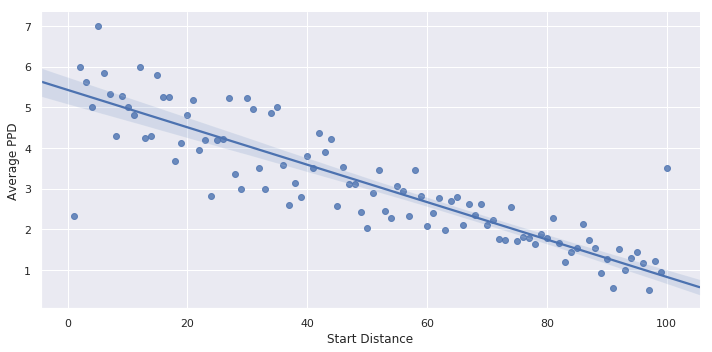

In [10]:
fig = sns.lmplot(x="start_distance", y="mean", data=grouped, robust=True, aspect=2)
fig.set(xlabel="Start Distance", ylabel="Average PPD")
fig

In [11]:
df.to_csv("Data/2018drives_augmented.tsv", sep="\t", index=False)

df

,offense,defense,game_id,plays,start_yardline,yards,end_yardline,drive_result,points,start_distance,dist_range
0,Alabama,Louisville,401012246,7,35,65,100,TD,7,65,"(60.0, 65.0]"
1,Louisville,Alabama,401012246,4,75,20,55,PUNT,0,75,"(70.0, 75.0]"
2,Alabama,Louisville,401012246,8,20,63,65,FUMBLE,0,80,"(75.0, 80.0]"
3,Louisville,Alabama,401012246,3,83,-1,84,PUNT,0,83,"(80.0, 85.0]"
4,Alabama,Louisville,401012246,6,45,55,100,TD,7,55,"(50.0, 55.0]"
5,Louisville,Alabama,401012246,8,75,49,26,INT,0,75,"(70.0, 75.0]"
6,Alabama,Louisville,401012246,6,25,75,100,TD,7,75,"(70.0, 75.0]"
7,Louisville,Alabama,401012246,6,86,31,55,PUNT,0,86,"(85.0, 90.0]"
8,Alabama,Louisville,401012246,5,22,19,41,PUNT,0,78,"(75.0, 80.0]"
9,Louisville,Alabama,401012246,4,80,20,60,PUNT,0,80,"(75.0, 80.0]"


In [12]:
grouped.to_csv("Data/2018drives_grouped.tsv", sep="\t", index=False)